In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("aerofit.csv")

In [3]:
df.shape

(180, 9)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
#basic exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observation:
No null values

In [6]:
df.isnull().sum()/df.shape[0] * 100  #proportion of missing values in %

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df["Product"].value_counts(normalize = True) * 100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

#### Observations :
1) 44.44% of the people are buying KP281 which is an entry-level treadmill.  
2) 33.33% of the people are buying KP481 which is mid-level treadmill.  
3) 22.22% of the people are buying KP781 which is an advanced treadmill.  

In [9]:
df.groupby("Product")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,46418.025,9075.783190,29562.0,38658.00,46617.0,53439.0,68220.0
KP481,60.0,48973.650,8653.989388,31836.0,44911.50,49459.5,53439.0,67083.0
KP781,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.0,104581.0


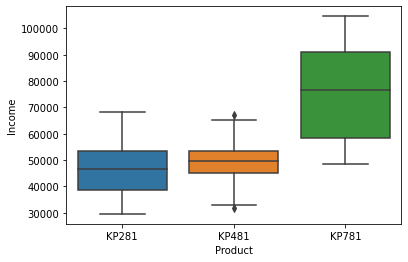

In [10]:
sns.boxplot(x = "Product", y = "Income" , data = df)
plt.show()

#### Observations :
1) There is no major difference in mean and median values of income ==> Less outliers.

2) Mean income of people who buy KP281 is less than other two groups's mean income. 

3) People who buy KP781 have the highest mean income among all three groups.

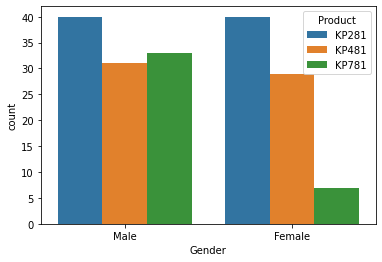

In [11]:
sns.countplot(x = df["Gender"], hue = df["Product"])
plt.show()

#### Observations:
1) Very few females bought KP781 as compared to males.

2) Both males and females have bought almost equal number of KP281 and KP481


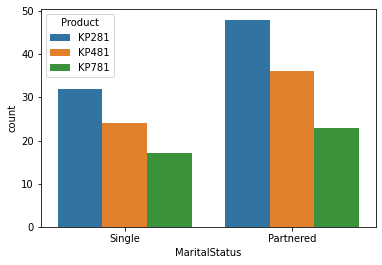

In [12]:
sns.countplot(x = df["MaritalStatus"], hue = df["Product"])
plt.show()

#### Observations:
1) Partnered cusomers are more for all three products.

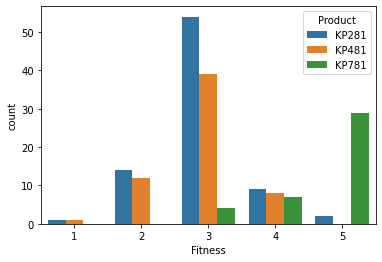

In [13]:
sns.countplot(x = df["Fitness"], hue = df["Product"])
plt.show()

#### Observations:
1) Fit people are prefering KP781 and average people going for KP281 and KP481 

In [14]:
df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [15]:
df["Age_bins"] = pd.cut(df["Age"],bins = [15,20,25,30,35,40,45,50], 
                        labels = ["15-20","21-25","26-30","31-35","36-40","41-45","46-50"])

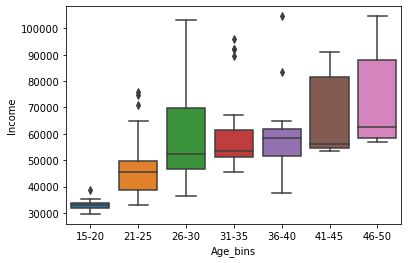

In [16]:

sns.boxplot(x = "Age_bins", y = "Income" , data = df)
plt.show()

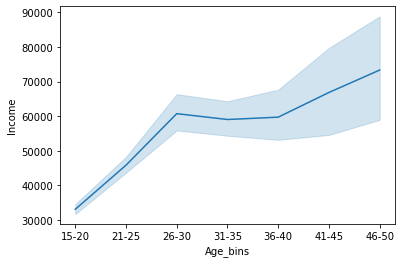

In [17]:
sns.lineplot(x = "Age_bins", y = "Income" , data = df)
plt.show()

#### Observations:
1) As age increases income also increases.

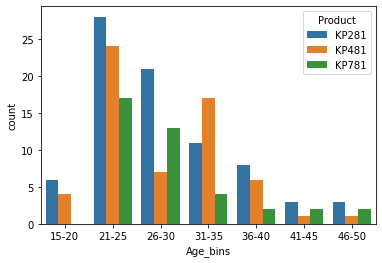

In [18]:
sns.countplot(x = df["Age_bins"], hue = df["Product"])
plt.show()

#### Observations:
1) People in the age group of "21-25" are more interested in fitness.

2) In all age groups KP281 is the most prefered product except "31-35" age group where KP481 is prefered.


#### Suggestion:
1) Target people in the age group of "21-40"

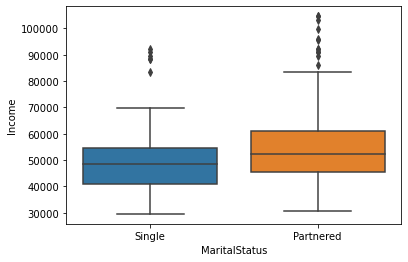

In [19]:
sns.boxplot(x = "MaritalStatus", y = "Income" , data = df)
plt.show()

#### Observations :
1) Single customers have lower income than Partnered


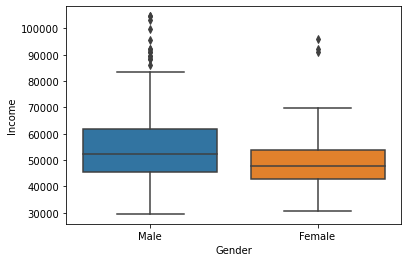

In [20]:
sns.boxplot(x = "Gender", y = "Income" , data = df)
plt.show()

#### Observations :
1) Male customers have higher income than Female

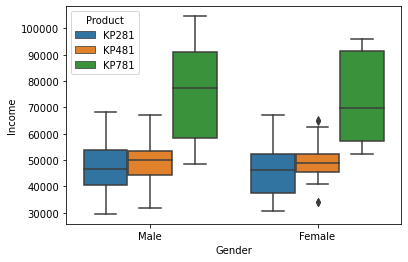

In [21]:
sns.boxplot(x = "Gender", y = "Income", data = df, hue = "Product")
plt.show()

#### Observations :
1) Customers with higher income tend to buy KP781

2) Customers dont find KP481 more value for money product than KP281

3) There is no much difference in median income of male and female who are buying KP281 and KP481 .

4) There is difference in median income of male and female who are buying KP781

#### Suggestion:
1) Improve some features of KP481 and increase its price also.

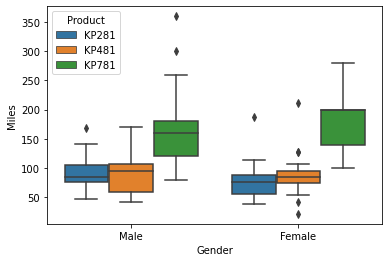

In [22]:
sns.boxplot(x = "Gender", y = "Miles", data = df, hue = "Product")
plt.show()

#### Observations:
1) People who are fitness freak buys KP781

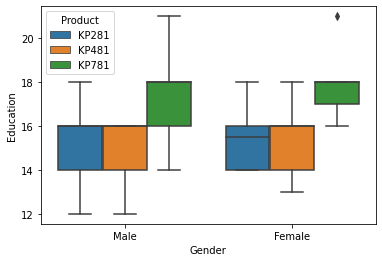

In [23]:
sns.boxplot(x = "Gender", y = "Education", data = df, hue = "Product")
plt.show()

#### Observations:
1) Highly educated people buy KP781 

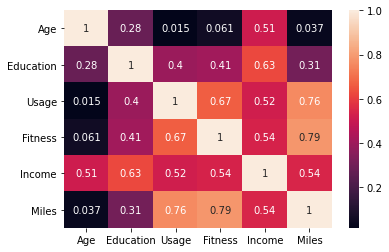

In [24]:
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Observations:
1) Highly educated people have high income.

2) Fit people runs more.

3) People who runs more have very high usage

### Marginal Probabilities:

In [25]:

df["Product"].value_counts(normalize = True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

#### Observations: 
1) p(people buying KP281) = 44.44%

2) p(people buying KP481) = 33.33%

3) p(people buying KP781) = 22.22%

In [26]:
df["MaritalStatus"].value_counts(normalize = True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

#### Observations:
1) p(customer being partnered) = 59.44%

2) p(customer being Single) =  40.56%

In [27]:
df["Gender"].value_counts(normalize = True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

#### Observations:
1) p(customer being male) = 57.78%

2) p(customer being female) = 42.22%

### Joint probabilities:

In [28]:
pd.crosstab(columns = df["Product"],
           index = df["MaritalStatus"],
           normalize = True,
           margins = True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


#### Observations:
1) p(customer being Single and buying KP281) = 17.78%

2) p(customer being Single and buying KP481) = 13.33%

3) p(customer being Single and buying KP781) = 9.44%

4) p(customer being Partnered and buying KP281) = 26.66%

5) p(customer being Partnered and buying KP481) = 20.00%

6) p(customer being Partnered and buying KP781) = 12.78%



In [29]:
pd.crosstab(columns = df["Product"], 
            index= df["Gender"],
            margins = True,
            normalize = True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


#### Observations:
1) p(customer being male and buying KP281) = 22.22%

2) p(customer being male and buying KP481) = 17.22%

3) p(customer being male and buying KP781) = 18.33%

4) p(customer being female and buying KP281) = 22.22%

5) p(customer being female and buying KP481) = 16.11%

6) p(customer being female and buying KP781) = 3.88%

### Conditional probabilities:

In [30]:
pd.crosstab(columns = df["Product"], 
            index= df["MaritalStatus"],
            margins = True, 
            normalize = "index")*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671
All,44.444444,33.333333,22.222222


#### Observations:
1) p( KP781 | Partnered) = 21.50%

2) p( KP781 | Single) = 23.29%

3) p( KP481 | Partnered) = 33.64%

4) p( KP481 | Single) = 32.88%

5) p( KP281 | Partnered) = 44.86%

6) p( KP281 | Single) = 43.84%


### Customer profiling:


#### Profile1:high income, highly educated fit male

In [69]:
c1 = (df["Income"]>=df["Income"].mean())
c2 = (df["Education"]>=df["Education"].mean())
c3 = (df["Fitness"]>=df["Fitness"].mean())
c4 = (df["Gender"]== "Male")

profile1 = df[c1 & c2 & c3 & c4]
profile1


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
72,KP281,39,Male,16,Partnered,4,4,59124,132,36-40
126,KP481,34,Male,16,Partnered,3,4,59124,85,31-35
141,KP781,22,Male,16,Single,3,5,54781,120,21-25
143,KP781,23,Male,16,Single,4,5,58516,140,21-25
146,KP781,24,Male,16,Single,4,5,61006,100,21-25
147,KP781,24,Male,18,Partnered,4,5,57271,80,21-25
151,KP781,25,Male,16,Partnered,4,4,62251,160,21-25
154,KP781,25,Male,18,Partnered,6,4,70966,180,21-25
155,KP781,25,Male,18,Partnered,6,5,75946,240,21-25
156,KP781,25,Male,20,Partnered,4,5,74701,170,21-25


In [70]:
profile1["Product"].value_counts(normalize = True)*100

KP781    92.307692
KP281     3.846154
KP481     3.846154
Name: Product, dtype: float64

#### Observations:
1) 92.3% is the probability that high income, highly educated fit male will buy KP781

#### Profile2: average/ less fit, average/less usage 

In [75]:
c1 = (df["Fitness"]<=3)
c2 = (df["Usage"]<=3)
profile2 = df[c1 & c2]
profile2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
1,KP281,19,Male,15,Single,2,3,31836,75,15-20
3,KP281,19,Male,12,Single,3,3,32973,85,15-20
5,KP281,20,Female,14,Partnered,3,3,32973,66,15-20
6,KP281,21,Female,14,Partnered,3,3,35247,75,21-25
7,KP281,21,Male,13,Single,3,3,32973,85,21-25
...,...,...,...,...,...,...,...,...,...,...
135,KP481,40,Female,16,Partnered,3,3,61398,85,36-40
136,KP481,40,Female,16,Single,3,3,57987,85,36-40
137,KP481,40,Male,16,Partnered,3,3,64809,95,36-40
138,KP481,45,Male,16,Partnered,2,2,54576,42,41-45


In [76]:
profile2["Product"].value_counts(normalize = True)*100

KP281    56.043956
KP481    43.956044
Name: Product, dtype: float64

#### Observations:
1) Less fit and less usage user go for KP281 and KP481

2) No clear distinction between KP281 and KP481 ==> Users dont find KP481 attractive pricewise and featurewise

### Recommendations:
1) Improve some features of KP481 and increase its price also.

2) Target high income, highly educated fit male for KP781

3) People in the age group of "21-40" are more aware about fitness so target them.

4) Target less fit and less usage user for KP281.